In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-12-29 13:45:03--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-12-29 13:45:03 (42.5 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
# convert categorical data to numerical data
numericDataset = dataset.copy(deep = True)
numericDataset["sex"] = pd.factorize(numericDataset["sex"])[0]
numericDataset["region"] = pd.factorize(numericDataset["region"])[0]
numericDataset["smoker"] = pd.factorize(numericDataset["smoker"])[0]

numericDataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,1,31.0,3,1,2,10600.55
1334,18,0,31.9,0,1,3,2205.98
1335,18,0,36.9,0,1,1,1629.83
1336,21,0,25.8,0,1,0,2007.95
1337,61,0,29.1,0,0,2,29141.36


In [ ]:
# split data
cut = 0.8 * len(numericDataset)
cut = int(cut)

train_dataset = numericDataset.iloc[:cut]
test_dataset = numericDataset.iloc[cut:]

train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

train_dataset.tail()

,age,sex,bmi,children,smoker,region
1065,42,0,25.3,1,1,0
1066,48,1,37.3,2,1,1
1067,39,1,42.7,0,1,3
1068,63,1,21.7,1,1,2
1069,54,0,31.9,1,1,1


In [ ]:
# normalization
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(np.array(train_dataset))

normalizer.mean.numpy()

array([[39.551403  ,  0.5102803 , 30.78495   ,  1.0757008 ,  0.79906523,
         1.484112  ]], dtype=float32)

In [ ]:
# build model
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(32),
    layers.Dense(1)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
    loss = 'mean_absolute_error',
    metrics = ['mae', 'mse']
    )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 270
Trainable params: 257
Non-trainable params: 13
_________________________________________________________________


In [ ]:
# train model
history  = model.fit(
    train_dataset,
    train_labels,
    epochs = 60,
    verbose = 0
    )

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
55,3432.137939,3432.137939,50089936.0,55
56,3419.633057,3419.633057,48974388.0,56
57,3410.452393,3410.452393,48184520.0,57
58,3430.778076,3430.778076,48837984.0,58
59,3422.193604,3422.193604,48542956.0,59


9/9 - 0s - loss: 3474.5469 - mae: 3474.5469 - mse: 47024128.0000 - 18ms/epoch - 2ms/step
Testing set Mean Abs Error: 3474.55 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 1ms/step


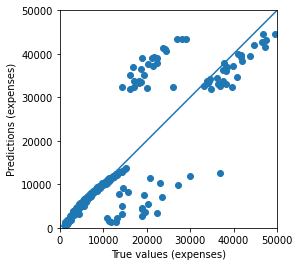

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
